<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



In [337]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scp
import sympy as sp

In [394]:
def RK4_(funct,y0,t_,h_,*params):
  x = np.zeros(len(t_))
  x[0] = y0[0]
  vx = np.zeros(len(t_))
  vx[0] = y0[1]
  for i in range(len(t_)-1):
    k1 = funct(y0,t_[i],*params)
    k2 = funct(y0+(h_/2)*k1,t_[i]+h_/2,*params)
    k3 = funct(y0+(h_/2)*k2,t_[i]+h_/2,*params)
    k4 = funct(y0+h*k3,t_[i]+h_,*params)
    wi = y0+(h_/6)*(k1+2*k2+2*k3+k4)
    y0[0],y0[1] = wi[0],wi[1]
    x[i+1], vx[i+1] = y0[0], y0[1]
  return x,vx

def rk4(fun,t,y,*params):
  h = t[1]-t[0]
  for i in range(0,len(t)-1,1):
    k1_ = fun(t[i],y[i], *params)
    k2_ = fun(t[i]+h/2,y[i]+h/2*k1_,*params)
    k3_ = fun(t[i]+h/2,y[i]+h/2*k2_,*params)
    k4_ = fun(t[i]+h,y[i]+h*k3_,*params)

    y[i+1] = y[i] + h/6 * (k1_+2*k2_+2*k3_+k4_)

  return y


1 (30%) La solución numérica de la ecuación diferencial.

In [395]:
## condiciones iniciales
A = 5*(10**(-5)) ## m
Ta = 300
k = 200
p = 0.102
Tb = 313
h = 20
# valor inicial
theta0 = [13,-13*np.sqrt((h*p)/(A*k))]
# longitud de la aleta
x = np.linspace(0,1e-10,100)
theta1 = np.array([Tb-Ta,0])
params = (h,p,k,A)
params2 = (h,p,k,A,Ta,Tb)


\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}



Ecuacion diferencial a resolver

In [401]:
# theta es el vector con [u1,u2]
def funct(theta,x,h,p,k,A):
  u1,u2 = theta
  a = (h*p)/(k*A)
  dthetadx = [u2,(a**2)*u1]
  return dthetadx

def funct2(theta,x,h,p,k,A):
  u1,u2 = theta
  a = (h*p)/(k*A)
  dthetadx = [u2,(a**2)*u1]
  return np.array(dthetadx)

In [397]:
u = integrate.odeint(funct,theta0,x, args = (h,p,k,A))[:,0]
T = u+Ta

In [398]:
T

array([313.        , 313.        , 313.        , 313.        ,
       313.        , 313.        , 313.        , 313.        ,
       313.        , 313.        , 313.        , 313.        ,
       313.        , 313.        , 313.        , 313.        ,
       313.        , 313.        , 313.        , 313.        ,
       313.        , 313.        , 313.        , 313.        ,
       313.        , 313.        , 313.        , 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99999999,
       312.99999999, 312.99999999, 312.99999999, 312.99

In [399]:
RK4_(funct2,theta0,x,x[1]-x[0],*params)

(array([13.        , 13.00000182, 13.00000364, 13.00000546, 13.00000729,
        13.00000911, 13.00001093, 13.00001275, 13.00001457, 13.00001639,
        13.00001821, 13.00002004, 13.00002186, 13.00002368, 13.0000255 ,
        13.00002732, 13.00002914, 13.00003096, 13.00003279, 13.00003461,
        13.00003643, 13.00003825, 13.00004007, 13.00004189, 13.00004371,
        13.00004553, 13.00004736, 13.00004918, 13.000051  , 13.00005282,
        13.00005464, 13.00005646, 13.00005828, 13.00006011, 13.00006193,
        13.00006375, 13.00006557, 13.00006739, 13.00006921, 13.00007103,
        13.00007286, 13.00007468, 13.0000765 , 13.00007832, 13.00008014,
        13.00008196, 13.00008378, 13.00008561, 13.00008743, 13.00008925,
        13.00009107, 13.00009289, 13.00009471, 13.00009653, 13.00009836,
        13.00010018, 13.000102  , 13.00010382, 13.00010564, 13.00010746,
        13.00010928, 13.00011111, 13.00011293, 13.00011475, 13.00011657,
        13.00011839, 13.00012021, 13.00012203, 13.0

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

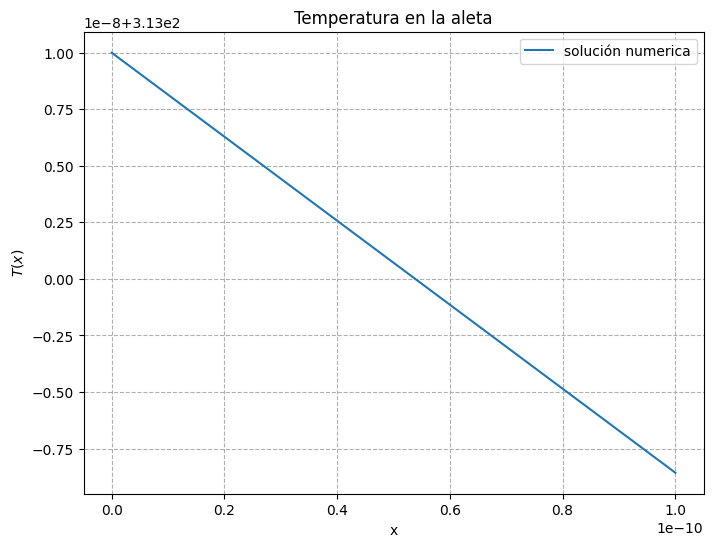

In [400]:
plt.figure(figsize = (8,6))
plt.plot(x,T,label = "solución numerica")
plt.grid(True, ls = "dashed")
plt.title("Temperatura en la aleta")
plt.ylabel(r"$T(x)$")
plt.xlabel("x")
plt.legend()


3 (25%) Compare la solución numérica con la analítica

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}

In [358]:
## solucion analitica.

def T_ana2(x,h,p,k,A,Ta,Tb):
  T1 = Tb-Ta
  T2 = np.exp(-x*np.sqrt( (h*p)/(k*A) ) )
  val = Ta + T1*T2
  return val

T_ana = lambda x,h,p,k,A,Ta,Tb : Ta + (Tb-Ta)*np.exp(-x*np.sqrt((h*p)/(k*A)))

In [359]:
# aquí vamos a construir el error absoluto

e = np.zeros(len(x))
for i in range(len(e)):
  e[i] = abs(T[i]-T_ana(x[i],*params2))

Text(0.5, 1.0, 'Error absoluto')

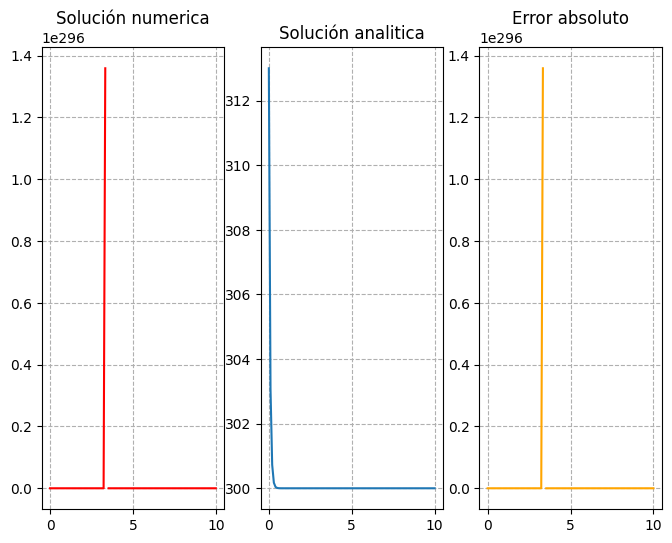

In [360]:
fig,ax = plt.subplots(1,3,figsize = (8,6))
ax[1].plot(x,T_ana(x,*params2))
ax[1].grid(True, ls = "dashed")
ax[1].set_title("Solución analitica")
ax[0].plot(x,T, color = "red")
ax[0].grid(True, ls = "dashed")
ax[0].set_title("Solución numerica")
ax[2].plot(x,e, color = "orange")
ax[2].grid(True, ls = "dashed")
ax[2].set_title("Error absoluto")

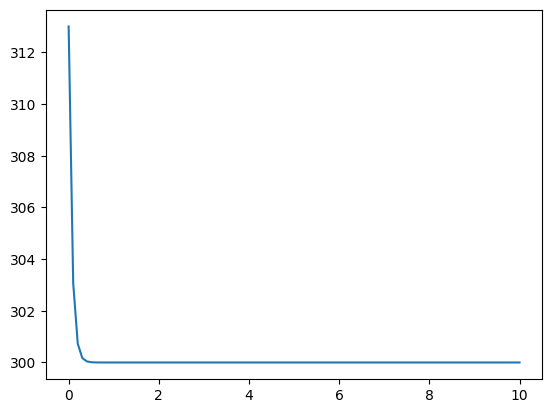

In [347]:
plt.plot(x,T_ana2(x,*params2))


4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K

In [348]:
# metodo de newton

T_newt = lambda x,h,p,k,A,Ta,Tb : Ta + (Tb-Ta)*np.exp(-x*np.sqrt((h*p)/(k*A))) -305



In [349]:
point = scp.newton(T_newt,0, args = (h,p,k,A,Ta,Tb))
point

0.0668991823266331

In [350]:
T_ana2(point,*params2)

305.0000000000003

In [351]:
### solucion analitica.

y = sp.Function("y")
a = sp.Symbol("a")
t = sp.Symbol("t")

In [352]:
edo = y(t).diff(t,2)-a**2*y(t)
sp.dsolve(edo)

Eq(y(t), C1*exp(-a*t) + C2*exp(a*t))